In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

import missingno as msno 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [3]:
df_train= pd.read_csv('./houseprices/train.csv')
df_tesst= pd.read_csv('./houseprices/test.csv')

In [4]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [5]:
#head 반대 tail

In [6]:
#카테고리형과 숫자형을 나눠서 보고 싶을때
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_obj = df_train.select_dtypes(include=[np.object])

#다른 방법으로 include와 exclude방법이 있다.
'''
incldue = 'object'하면
exclude = 'object로 object인 것을 포함하는 것과 object가 아닌것을 포함하는 것
'''



"\nincldue = 'object'하면\nexclude = 'object로 object인 것을 포함하는 것과 object가 아닌것을 포함하는 것\n"

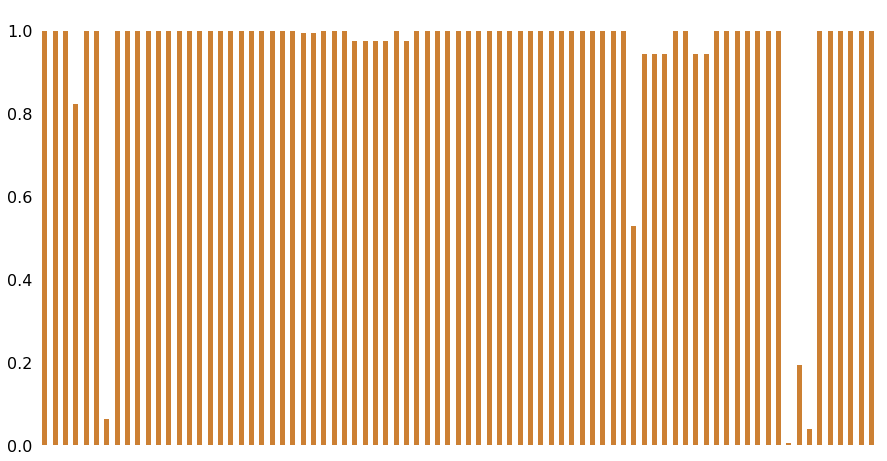

In [7]:
msno.bar(df=df_train.iloc[:,:], figsize=(15,8), color=(0.8,0.5,0.2))

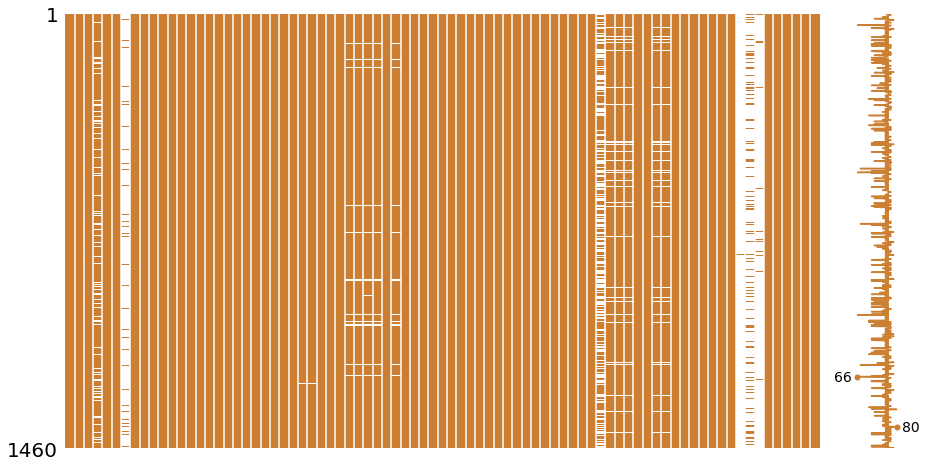

In [8]:
msno.matrix(df=df_train.iloc[:,:], figsize=(15,8), color=(0.8,0.5,0.2))

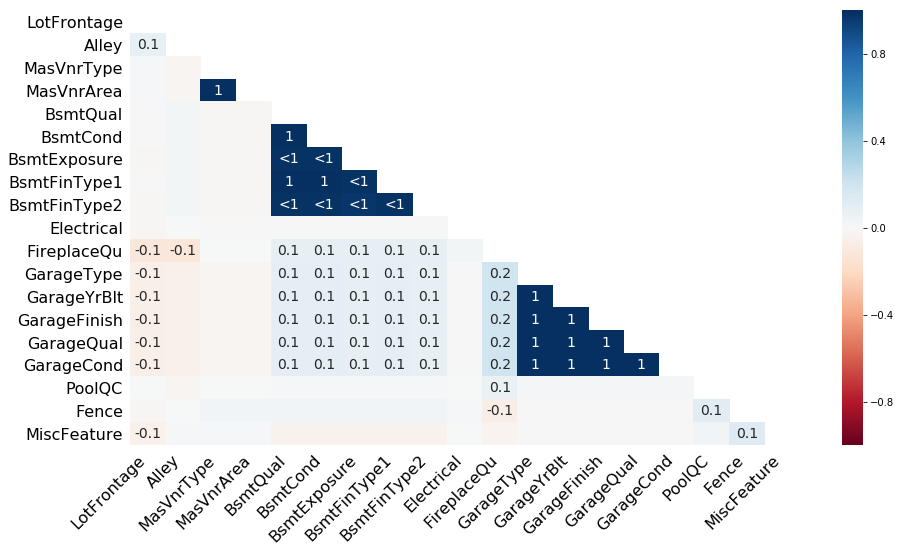

In [9]:
msno.heatmap(df=df_train.iloc[:,:], figsize=(15,8))

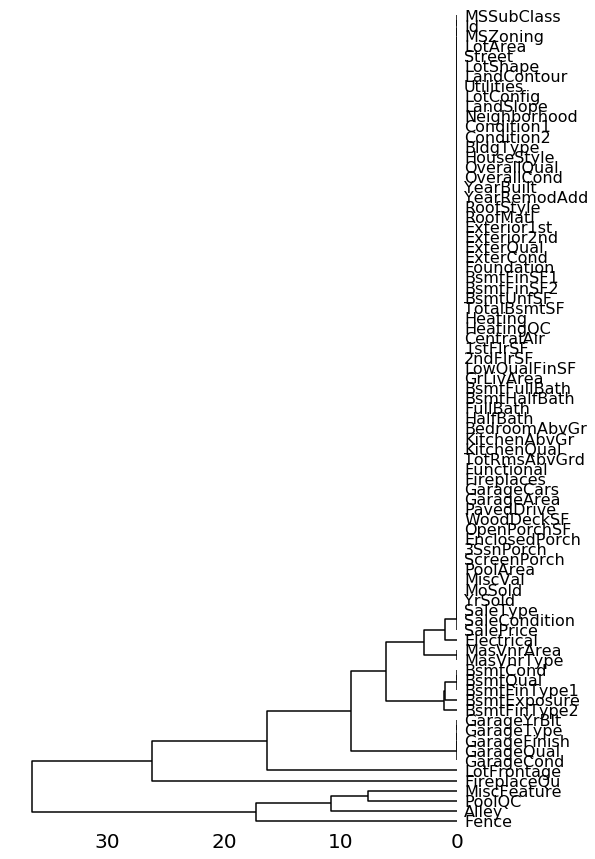

In [10]:
msno.dendrogram(df=df_train.iloc[:,:], figsize=(8,15))

In [11]:
df_train.skew() #표본 비대칭도
#왜도, 평균 값을 기준으로 왼쪽과 오른쪽 중 어느 쪽에 더 치우져 있는지 확인한다.

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [12]:
df_train.kurt() #표본 첨도
#첨도가 3이면 정규분포와 동일하다. 이보다 크면 좌,우에 극값이 많이 존재함을 의미.

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

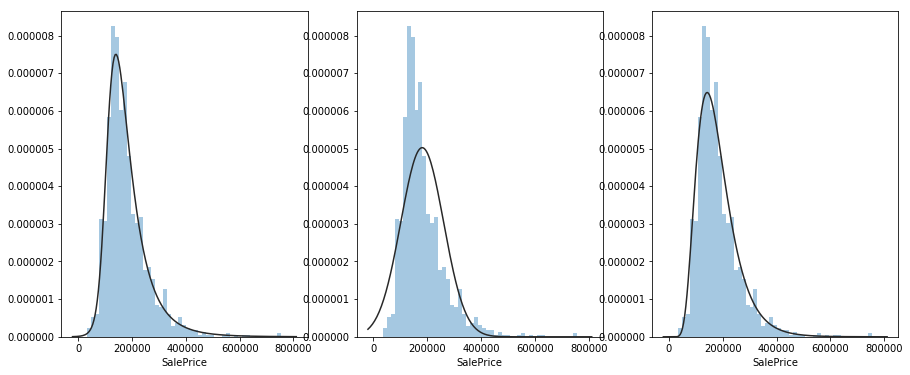

In [34]:
from scipy import stats

target = df_train['SalePrice']
f,ax=plt.subplots(1,3, figsize=(15,6), sharex=True)
# sns.distplot(target,ax=ax[0])
sns.distplot(target,kde=False, fit=stats.johnsonsu,ax=ax[0])
sns.distplot(target,kde=False, fit=stats.norm, ax=ax[1])
sns.distplot(target,kde=False, fit=stats.lognorm, ax=ax[2])
#차이가 두드러지는 걸 완만하게,
#norm이 어느정도 gap이 보이는걸 로그를 취하니
#전체적인 차이는 줄면서 방향을 따라감.

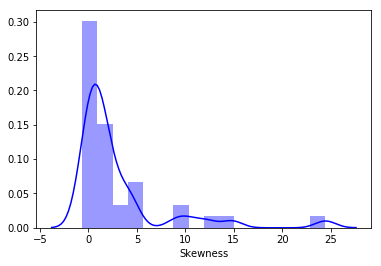

In [31]:
sns.distplot(df_train.skew(), color='blue', axlabel='Skewness')

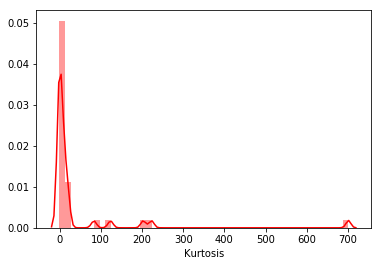

In [38]:
sns.distplot(df_train.kurt(), color='r', axlabel='Kurtosis',
            norm_hist=False, kde=True, rug=False)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

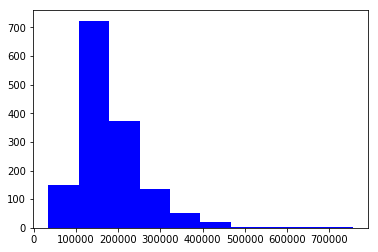

In [39]:
plt.hist(df_train['SalePrice'],orientation='vertical', histtype='bar',
        color='blue')

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

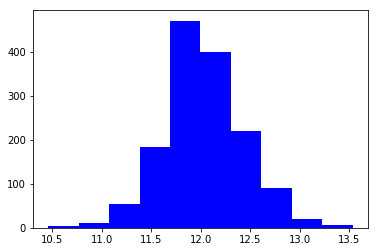

In [46]:
log_target=np.log(df_train['SalePrice'])
log_target.skew()
plt.hist(log_target, color='blue')

In [52]:
#visualisation methods to analyze the data better
#1.correlation

#숫자형과 target과의 상관관계를 알고싶을떄?
correlation=df_train_num.corr() #전체 각 feature간의 관계
correlation['SalePrice'].sort_values(ascending=False) #SalePrice = target이 다른 feature들 과의 관계를 값으로 보여줌.


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

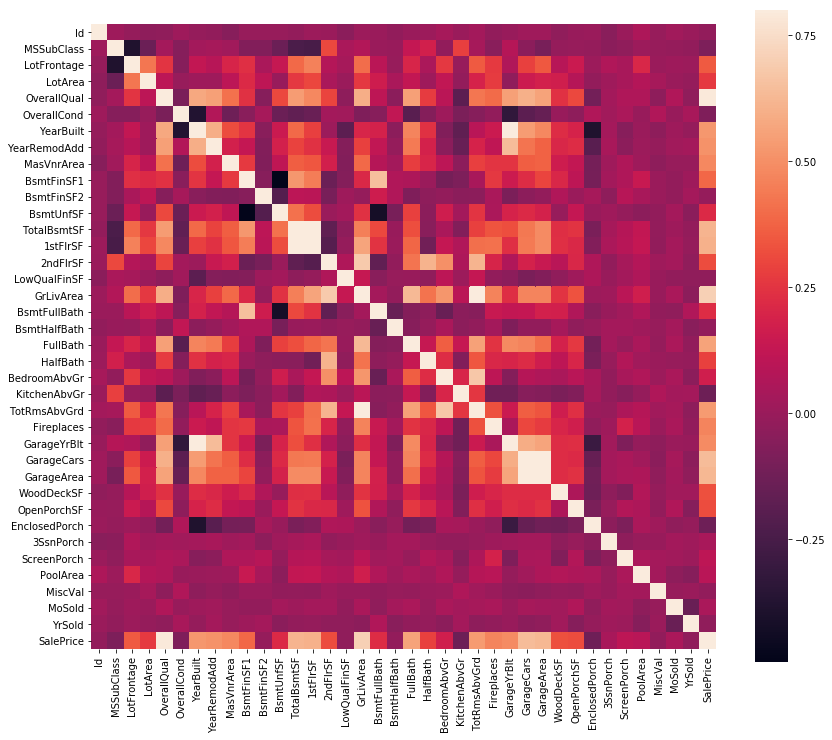

In [60]:
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(correlation, square=True, vmax=0.8)

In [65]:
#zoomed heatmap
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733,
        0.50710097],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277,
        0.55068392],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971,
        0.28738852],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009,
        0.42062215],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382,
        0.37159981],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ,
        0.29106558],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.

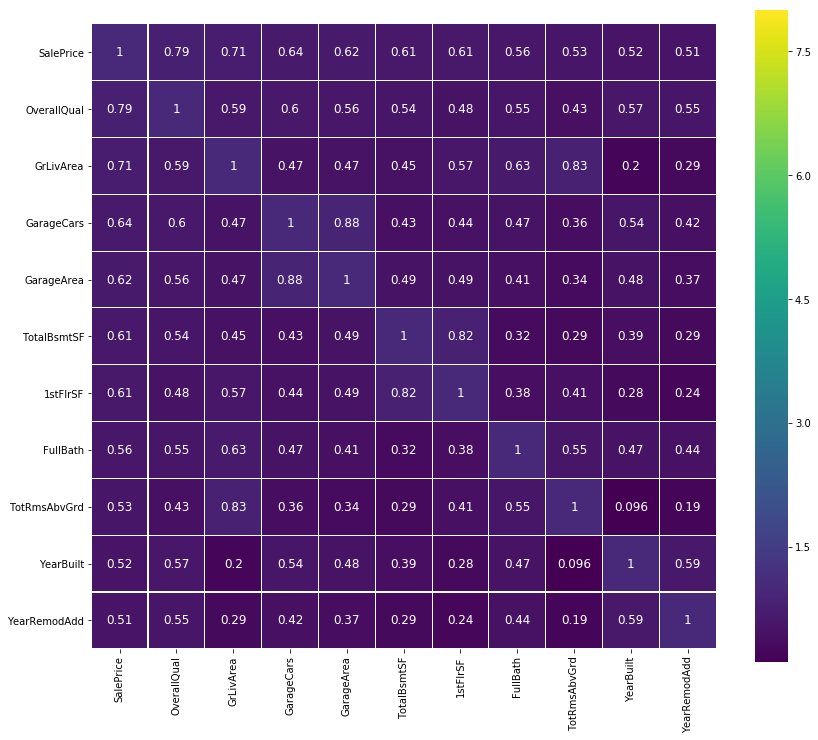

In [68]:
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=8, linewidths=0.01, square=True,
           annot=True, cmap='viridis',
           linecolor='white', xticklabels=cols.values,
           annot_kws={'size':12}, yticklabels=cols.values)

#높은 상관관계를 가지는 feature를 본다.
#twin으로 보여지는 feature 두개는 하나로 봐도 된다.


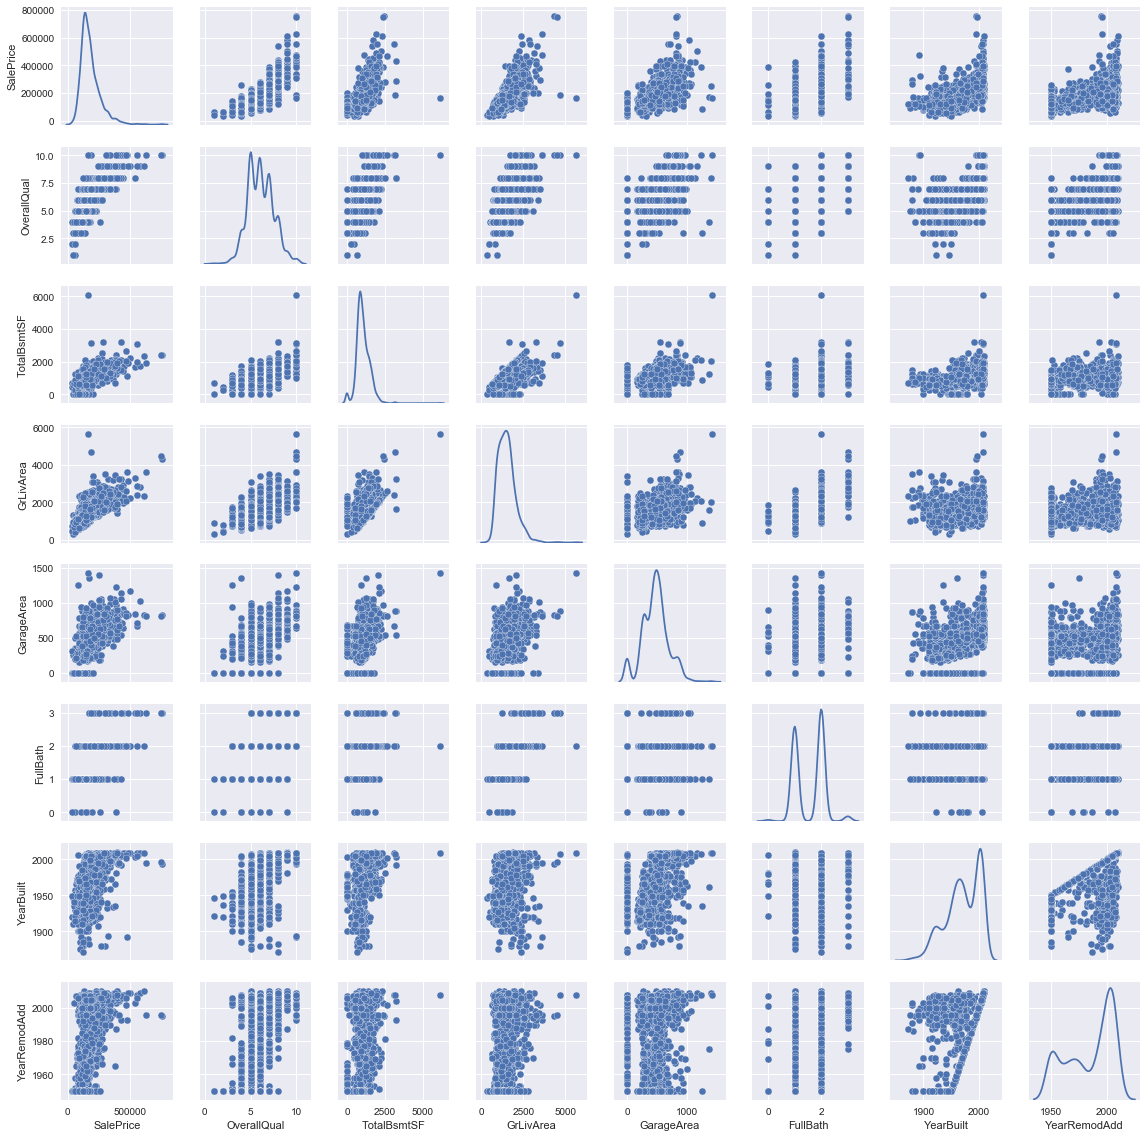

In [70]:
#Pair plot
#'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath',
#'YearBuilt','YearRemodAdd'
#위의 과정을 통해서 
#타겟과 관련된 feature들을 본다?

sns.set()
columns=['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath',
        'YearBuilt','YearRemodAdd']
sns.pairplot(df_train[columns], size=2, kind='scatter', diag_kind='kde')


#dot cloud???


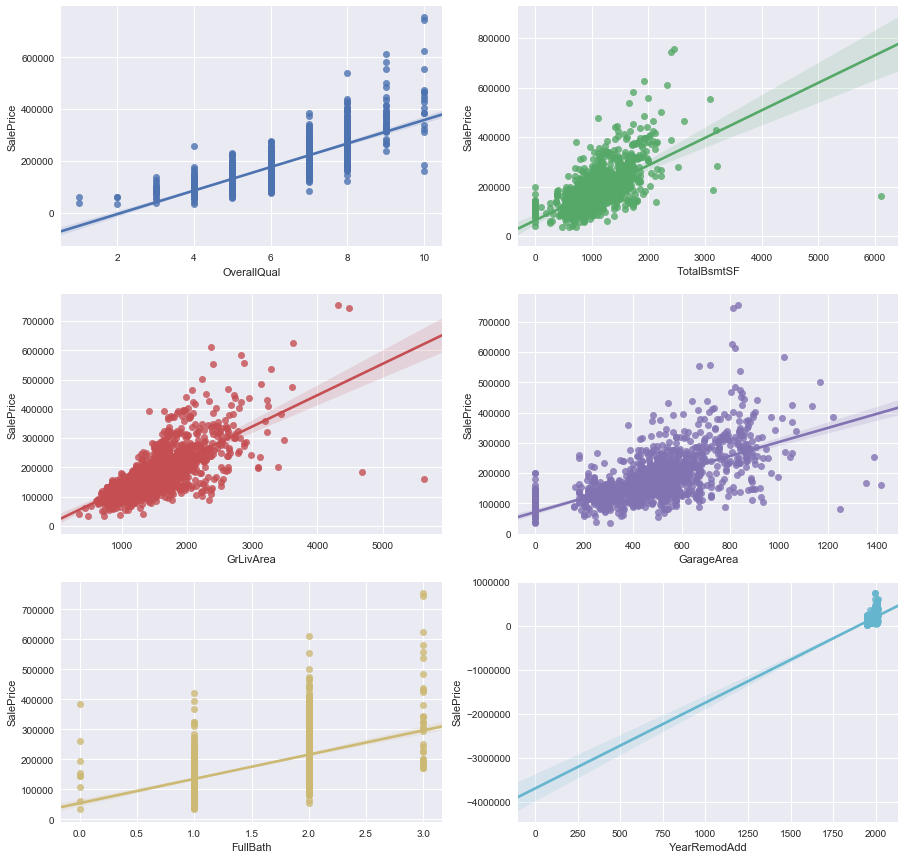

In [120]:
#scatter plot
fig, ax = plt.subplots(3,2,figsize=(15,15))
#pd.concat
'''
데이터의 속성 형태가 동일한 데이터셋이 있으면, 
이들을 합칠 수 있다. 
'''
OverallQual_scatter_plot=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
sns.regplot(x='OverallQual',y='SalePrice',data=OverallQual_scatter_plot,
           scatter=True, fit_reg=True,ax=ax[0,0])
TotalBsmtSF_scatter_plot=pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=TotalBsmtSF_scatter_plot,
           scatter=True, fit_reg=True, ax=ax[0,1])

GrLivArea_scatter_plot=pd.concat([df_train['SalePrice'],df_train['GrLivArea']], axis=1)
sns.regplot(x='GrLivArea',y='SalePrice',data=GrLivArea_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[1,0])
GarageArea_scatter_plot=pd.concat([df_train['SalePrice'],df_train['GarageArea']],axis=1)
sns.regplot(x='GarageArea',y='SalePrice',data=GarageArea_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[1,1])

FullBath_scatter_plot=pd.concat([df_train['SalePrice'],df_train['FullBath']],axis=1)
sns.regplot(x='FullBath',y='SalePrice',data=FullBath_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[2,0])
YearRemodAdd_scatter_plot=pd.concat([df_train['SalePrice'],df_train['YearRemodAdd']],axis=1)
sns.regplot(x='YearRemodAdd',y='SalePrice',data=YearRemodAdd_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[2,1])

In [ ]:
YearRemodAdd_scatter_plot.plot.scatter('YearRe')